<h2>A fake Systolic Blood Pressure dataset will have to be generated as follows<h2>

In [63]:
import numpy as np

#Fixed random seed
np.random.seed(1337)

#Training dataset
ages_train = np.random.uniform(50, 80, 2000)
weights_train = np.random.uniform(50, 100, 2000)
SBP_train = np.random.uniform(110, 165, 2000)

#Testing dataset
ages_test = np.random.uniform(50, 80, 400)
weights_test = np.random.uniform(50, 100, 400)
SBP_test = np.random.uniform(110, 165, 400)

<h2>Casting array data set into the DataFrame<h2>

In [64]:
import pandas as pd
train_df = pd.DataFrame({'ages': ages_train, 'weights': weights_train, 'sbp': SBP_train})
test_df = pd.DataFrame({'ages': ages_test, 'weights': weights_test, 'sbp': SBP_test})

In [65]:
#Spliting the DataFrame to the X-Feature metrix and Y-label vector
X_train = train_df[['ages', 'weights']]
y_train = train_df['sbp']
X_test = test_df[['ages', 'weights']]
y_test = test_df['sbp']

<h2>Build the LinearRegression model and create the prediction line<h2>

In [66]:
from sklearn.linear_model import LinearRegression
model_L = LinearRegression()
model_L.fit(X_train, y_train)
yL_model = model_L.predict(X_test)

<h2>Calculate the Error of regression by using the Mean Squared Error(MSE)<h2>

In [67]:
from sklearn.metrics import mean_squared_error, r2_score

MSE = mean_squared_error(y_test, yL_model)
r_square = r2_score(y_test, yL_model)
print(f'MSE = {MSE}')
print(f'R-square = {r_square}')

MSE = 247.85861577934313
R-square = 0.00094493767745496


<h2>Generate the samples with different sizes to test and collect the error of training data with test data<h2>

In [68]:
train_errors = []
test_errors = []
sample_sizes = range(100, 2001, 5)

for sample_size in sample_sizes:
    #Generate the train sample data for each sizes
    sample = train_df.sample(n=sample_size, random_state=1337)

    #Split to X-features and y-label
    X_sam = sample[['ages', 'weights']]
    y_sam = sample['sbp']

    #Train the model with each samples
    model_L.fit(X_sam, y_sam)
    y_train_model = model_L.predict(X_sam)
    y_test_model = model_L.predict(X_test)

    #Calculate train and test error
    y_train_model = model_L.predict(X_sam)
    y_test_model = model_L.predict(X_test)
    train_errors.append(mean_squared_error(y_sam, y_train_model))
    test_errors.append(mean_squared_error(y_test, y_test_model))

<h2>Display the error of train and test samples that generate with different sizes<h2>

Text(0.5, 1.0, 'Train and Test Error versus each Sample sizes')

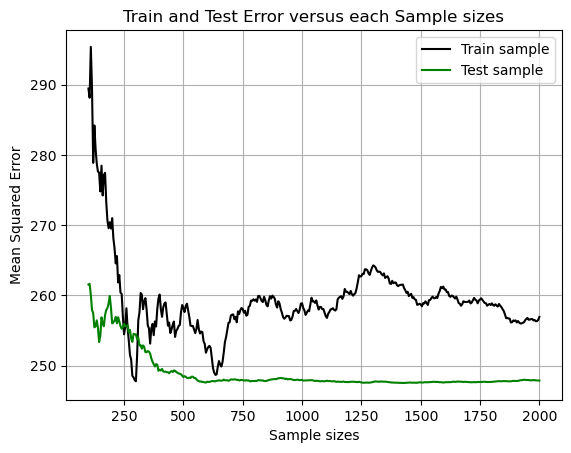

In [69]:
import matplotlib.pyplot as plt

plt.plot(sample_sizes, train_errors, '-k', label='Train sample')
plt.plot(sample_sizes, test_errors, '-g', label='Test sample')
plt.xlabel('Sample sizes')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid()
plt.title('Train and Test Error versus each Sample sizes')

<h2>Show the OLS line of this Fake data<h2>

F:\ANACON\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


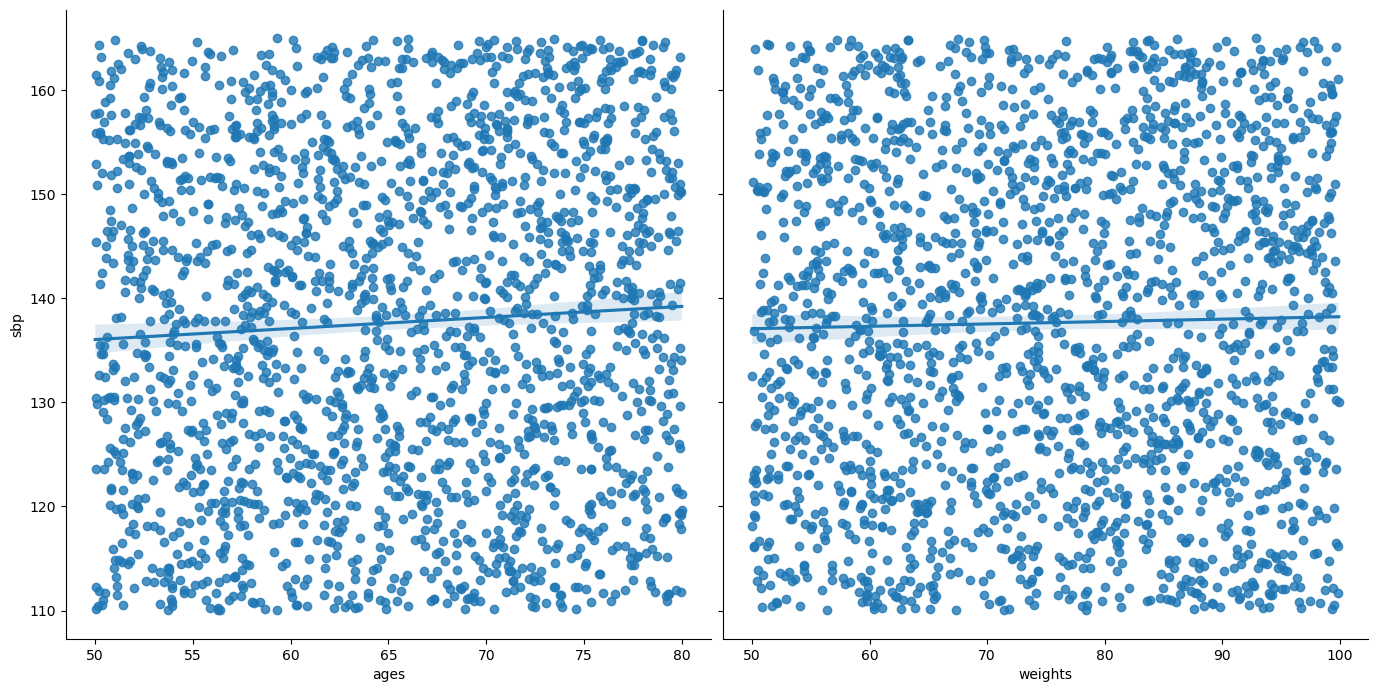

In [70]:
import seaborn as sns
sns.pairplot(train_df, x_vars=['ages', 'weights'], y_vars=['sbp'], kind='reg',size=7)
plt.show()